In [1]:
from __future__ import division
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import cmath
import time
import scipy.io.wavfile

    
def DFTloop(x,N):
    X = []
    for k in range(N):
        s = 0
        for n in range(N):
            s = s + x[n]*cmath.exp(complex(0,-(2*np.pi*k*n)/N))
        X.append(s)
    return (X)

def DFTmat(x,N):
    W = []
    for k in range(N):
        w = []
        for n in range(N):
            w.append(cmath.exp(complex(0,-(2*np.pi*k*n)/N)))
        W.append(w)
    W_ = np.array(W)
    x_ = np.array(x)
    X = np.matmul(W_,x_)
    return (X)

def IDFTmat(X,N):
    W = []
    for n in range(N):
        w = []
        for k in range(N):
            w.append(cmath.exp(complex(0,(2*np.pi*k*n)/N)))
        W.append(w)
    W_ = np.array(W)/float(N)
    X_ = np.array(X)
    x = np.matmul(W_,X_)
    return (x)

    
N=4
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
print(x)  
X=DFTmat(x,N)

print(X)

ix=IDFTmat(X,N)
print(ix)

X=DFTloop(x,N)

print(X)
e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[(0.6089784665961648+0.37678569406161033j), (0.6536926346329619+0.2746599470661637j), (0.08420823780823883+0.5919391098448183j), (0.2806755951858946+0.5413458889122306j)]
[ 1.62755493+1.78473064j  0.25808429-0.58817046j -0.24118153+0.15271897j
  0.79145617+0.15786362j]
[0.60897847+0.37678569j 0.65369263+0.27465995j 0.08420824+0.59193911j
 0.2806756 +0.54134589j]
[(1.6275549342232603+1.784730639884823j), (0.25808428694185925-0.5881704552302754j), (-0.24118152541445273+0.1527189679280343j), (0.7914561706339931+0.1578636236638596j)]
4.219582089838259


In [2]:
from __future__ import division
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import cmath
import time

    
def DCTloop(x,N):
    X = []
    for k in range(N):
        s = 0
        for n in range(N):
            s = s + x[n]*np.cos(np.pi*k*(n+0.5)/N)
        X.append(s)
    return (X)

def DCTmat(x,N):
    W = []
    for k in range(N):
        w = []
        for n in range(N):
            w.append(np.cos(np.pi*k*(n+0.5)/N))
        W.append(w)
    W_ = np.array(W)
    x_ = np.array(x)
    X = np.matmul(W_,x_)
    return (X)


def IDCTmat(X,N):
    W = []
    w = []
    for k in range(N):
        w = []
        w.append(0.5)
        for n in range(1,N,1):
            w.append(np.cos(np.pi*n*(k+0.5)/N))
        W.append(w)
    W_ = float(2)*np.array(W)/float(N)
    X_ = np.array(X)
    x = np.matmul(W_,X_)
    return (x)

    
N=4
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
print(x)
    
X=DCTmat(x,N)
print(X)

ix=IDCTmat(X,N)
print(ix)

e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[(0.7748467881046853+0.39571982773460035j), (0.8576471693155521+0.3125351168813092j), (0.4247029153791555+0.2539303566099259j), (0.4405490032558147+0.9338321370078301j)]
[ 2.49774588+1.89601744j  0.47453147-0.47472388j -0.04734383+0.53958363j
 -0.27205811-0.2600704j ]
[0.77484679+0.39571983j 0.85764717+0.31253512j 0.42470292+0.25393036j
 0.440549  +0.93383214j]
6.290254476462893


In [3]:
def haarMatrix(N):
    # Allow only size n of power 2
    N = 2**np.ceil(np.log2(N))
    if N > 2:
        h = haarMatrix(N / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    h_i = np.sqrt(N/2)*np.kron(np.eye(len(h)), [1, -1])    
    # combine parts
    h = np.vstack((h_n, h_i))
    return (h)

def Haar(x,N):
    W = []
    W = haarMatrix(N)/float(2)
    x_ = np.array(x)
    X = np.matmul(W,x_)
    return (X)

def IHaar(x,N):
    W = []
    W = haarMatrix(N)
    W = float(2)*np.transpose(W)/float(N)
    x_ = np.array(x)
    X = np.matmul(W,x_)
    return (X)

N=8
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
    
print(x)
    
X=Haar(x,N)
print(X)

ix=IHaar(X,N)
print(ix)

e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[(0.7817211393494192+0.24803020738809012j), (0.22339846642770222+0.847411477138782j), (0.7345941720745297+0.7442549918062381j), (0.013241032018748045+0.7996259075270672j), (0.5419080621186867+0.27103301106417454j), (0.5148906489300012+0.6966754757253103j), (0.9235100387003292+0.23000062676013067j), (0.2844950957287461+0.3901782507602243j)]
[ 2.00887933+2.11360497j -0.25592452+0.52571761j  0.18192755-0.31709441j
 -0.10691909+0.24574054j  0.55832267-0.59938127j  0.72135314-0.05537092j
  0.02701741-0.42564246j  0.63901494-0.16017762j]
[0.78172114+0.24803021j 0.22339847+0.84741148j 0.73459417+0.74425499j
 0.01324103+0.79962591j 0.54190806+0.27103301j 0.51489065+0.69667548j
 0.92351004+0.23000063j 0.2844951 +0.39017825j]
9.672312186176764


Text(0,0.5,'E(L)')

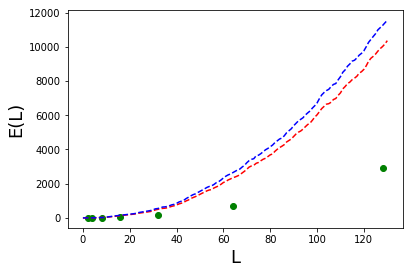

In [4]:
N=132
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
L= np.arange(N-1)
eX= np.zeros(N-1)
eY= np.zeros(N-1)
eZ= np.zeros(N-1)

for i in range(1,8,1):
    m=int(2**i)
    X=Haar(x[0:m],m)
    for j in range(0,m-1,1):
        eX[m]=eX[m]+np.abs(x[j]-X[j])**2

for i in range(1,N-1,1):
    Y=DCTmat(x[0:i],i)
    Z=DFTmat(x[0:i],i)
    for k in range(0,i-1,1):
        eY[i]=eY[i]+np.abs(x[k]-Y[k])**2
    for l in range(0,i-1,1):
        eZ[i]=eZ[i]+np.abs(x[l]-Z[l])**2
eX[eX==0]=np.nan

fig,ax = plt.subplots()
ax.plot(L,eX,'og-')
ax.plot(L,eY,'r--')
ax.plot(L,eZ,'b--')
ax.set_xlabel('L',fontsize = 18)
ax.set_ylabel('E(L)',fontsize = 18) 

Text(0,0.5,'E(L)')

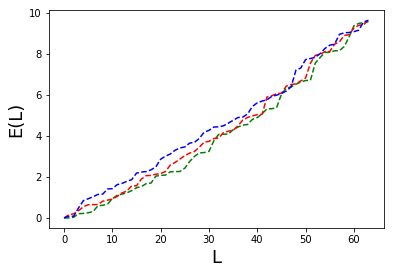

In [5]:
N=64
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
XDFT=DFTmat(x,N)
#print (XDFT)
XDCT=DCTmat(x,N)
XHaar=Haar(x,N)
XDFT_=DFTmat(x,N)
XDCT_=DCTmat(x,N)
XHaar_=Haar(x,N)
L= np.arange(N)
eX= np.zeros(N)
eY= np.zeros(N)
eZ= np.zeros(N)
for l in range(N):
    for i in range(int((N+1-l)/2),int((N-1+l)/2),1):
        XDFT[i]=0
    #print (XDFT)
    xdft=IDFTmat(XDFT,N)
    for j in range(N):
        eX[l]=eX[l]+np.abs(x[j]-xdft[j])**2
for l in range(N):
    for i in range(N-l,N,1):
        XDCT[i]=0
    xdct=IDCTmat(XDCT,N)
    for j in range(N):
        eY[l]=eY[l]+np.abs(x[j]-xdct[j])**2
for l in range(N):
    for i in range(N-l,N,1):
        XHaar[i]=0
    xhaar=IHaar(XHaar,N)
    for j in range(N):
        eZ[l]=eZ[l]+np.abs(x[j]-xhaar[j])**2
fig,ax = plt.subplots()
ax.plot(L,eX,'g--')
ax.plot(L,eY,'r--')
ax.plot(L,eZ,'b--')
ax.set_xlabel('L',fontsize = 18)
ax.set_ylabel('E(L)',fontsize = 18) 

Text(0,0.5,'E(L)')

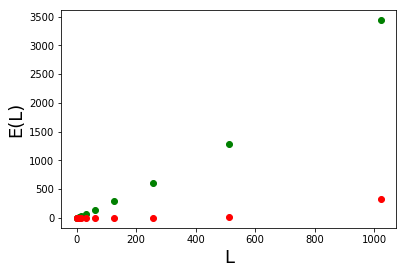

In [19]:
N=2048
[rate,data]=scipy.io.wavfile.read("audio1.wav")
signal=data[1000:3048]
x_real=signal[:,0]
x_img=signal[:,1]
#x_real = np.random.rand(N)
#x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
XDFT=DFTmat(x,N)
#print (XDFT)
XDCT=DCTmat(x,N)
XHaar=Haar(x,N)
XDFT_=DFTmat(x,N)
XDCT_=DCTmat(x,N)
XHaar_=Haar(x,N)
L= np.arange(N)
eX= np.zeros(N)
eY= np.zeros(N)
eZ= np.zeros(N)
for l in range(0,int(np.log2(N)),1):
    l=(2**l)-1
    for i in range(int((N+1-l)/2),int((N-1+l)/2),1):
        XDFT[i]=0
    #print (XDFT)
    xdft=IDFTmat(XDFT,N)
    for j in range(N):
        eX[l]=eX[l]+np.abs(x[j]-xdft[j])**2
for l in range(0,int(np.log2(N)),1):
    l=(2**l)-1
    for i in range(N-l,N,1):
        XDCT[i]=0
    xdct=IDCTmat(XDCT,N)
    for j in range(N):
        eY[l]=eY[l]+np.abs(x[j]-xdct[j])**2
#for l in range(0,int(np.log2(N)),1):
#    l=(2**l)-1
#    for i in range(N-l,N,1):
#        XHaar[i]=0
#    xhaar=IHaar(XHaar,N)
#    for j in range(N):
#        eZ[l]=eZ[l]+np.abs(x[j]-xhaar[j])**2
eX=(1.0/float(N))*eX
eY=(1.0/float(N))*eY
eX[eX==0]=np.nan
eY[eY==0]=np.nan
#eZ[eZ==0]=np.nan
fig,ax = plt.subplots()
ax.plot(L,eX,'go-')
ax.plot(L,eY,'ro-')
#ax.plot(L,eZ,'bo-')
ax.set_xlabel('L',fontsize = 18)
ax.set_ylabel('E(L)',fontsize = 18) 